In [1]:
import polars as pl
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
import matplotlib.cm as cm

group_dir = "/home/ubuntu/gigabit"
exp_id    = "gigabit_attack_100sec_without_tcpdump"

In [2]:
# Read the group's entire data

lazy_results_df = (
  pl.scan_parquet(f"{group_dir}/results.parquet")
)

configurations_df = (
  pl.read_parquet(f"{group_dir}/configurations.parquet")
)

metrics_df = (
  pl.read_parquet(f"{group_dir}/metrics.parquet")
)
pd_metrics_df = (
  metrics_df
  .to_pandas()
  .sort_values(by=["node_type", "trial", "observation_timestamp"])
)

pd_metrics_df

,node_type,metric_type,trial,metric_value,observation_timestamp,exp_id
1581,originserver,cpu_utilization,1,3.3,0,gigabit_attack_100sec_with_tcpdump
1881,originserver,memory_utilization,1,245.0,0,gigabit_attack_100sec_with_tcpdump
11090,originserver,cpu_utilization,1,2.4,0,gigabit_attack_100sec_without_tcpdump
11390,originserver,memory_utilization,1,238.0,0,gigabit_attack_100sec_without_tcpdump
11391,originserver,memory_utilization,1,237.0,0,gigabit_attack_100sec_without_tcpdump
...,...,...,...,...,...,...
17442,proxy,memory_utilization,3,8787.0,300,gigabit_attack_100sec_without_tcpdump
26985,proxy,memory_utilization,3,7923.0,300,gigabit_attack_50sec_with_tcpdump
26986,proxy,memory_utilization,3,7922.0,300,gigabit_attack_50sec_with_tcpdump
36524,proxy,memory_utilization,3,8147.0,300,gigabit_attack_50sec_without_tcpdump


In [3]:
%%time

summary_df = (
  lazy_results_df
  .filter(pl.col("exp_id") == exp_id)
  .groupby(["exp_id", "node_type", "trial"])
  .agg([
    pl.count("message_marker").alias("total_messages"),
    pl.col("message_timestamp").min().alias("min_timestamp_sec"),
    pl.col("message_timestamp").max().alias("max_timestamp_sec"),
  ])
  .sort(by=["node_type", "trial"])
  .with_columns([
    (pl.col("max_timestamp_sec") - pl.col("min_timestamp_sec")).alias("active_time_sec")
  ])
  .collect()
)

summary_df

CPU times: user 9.29 s, sys: 9.14 s, total: 18.4 s
Wall time: 8.57 s


exp_id,node_type,trial,total_messages,min_timestamp_sec,max_timestamp_sec,active_time_sec
str,str,i32,u32,f64,f64,f64


<IPython.core.display.Javascript object>


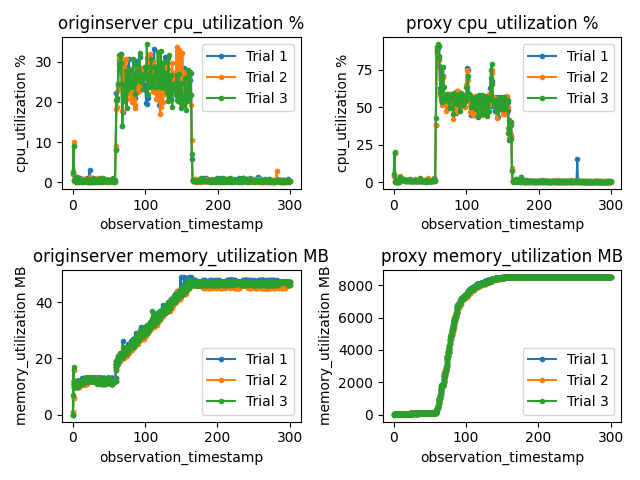

CPU times: user 612 ms, sys: 223 ms, total: 835 ms
Wall time: 421 ms


node_type,metric_type,trial,metric_value,observation_timestamp,exp_id
str,str,i64,f64,i64,str
"""proxy""","""cpu_utilization""",1,6.6,0,"""gigabit_attack_100sec_with_tcpdump"""
"""proxy""","""cpu_utilization""",1,20.7,1,"""gigabit_attack_100sec_with_tcpdump"""
"""proxy""","""cpu_utilization""",1,1.1,2,"""gigabit_attack_100sec_with_tcpdump"""
"""proxy""","""cpu_utilization""",1,0.6,3,"""gigabit_attack_100sec_with_tcpdump"""
"""proxy""","""cpu_utilization""",1,0.9,4,"""gigabit_attack_100sec_with_tcpdump"""
"""proxy""","""cpu_utilization""",1,1.3,5,"""gigabit_attack_100sec_with_tcpdump"""
"""proxy""","""cpu_utilization""",1,0.5,6,"""gigabit_attack_100sec_with_tcpdump"""
"""proxy""","""cpu_utilization""",1,0.6,7,"""gigabit_attack_100sec_with_tcpdump"""
"""proxy""","""cpu_utilization""",1,3.6,8,"""gigabit_attack_100sec_with_tcpdump"""


In [4]:
%%time

%matplotlib notebook

# Plot the node metrics for each device

exp_pd_metrics_df = pd_metrics_df[pd_metrics_df["exp_id"] == exp_id]

metric_types = exp_pd_metrics_df.metric_type.unique()
node_names = exp_pd_metrics_df.node_type.unique()
trials = exp_pd_metrics_df.trial.unique()

metric_type_map_extension = {
    "cpu_utilization": "%",
    "memory_utilization": "MB",
}

fig, axs = plt.subplots(len(node_names), len(metric_types))
for i, mt in enumerate(metric_types):
    for j, node_name in enumerate(node_names):
        for t in trials:
            # Filter each metric type observer node into its own tile, further filter by trial
            ax = axs[i, j]
            _df = exp_pd_metrics_df[(exp_pd_metrics_df["metric_type"] == mt) 
                             & (exp_pd_metrics_df["node_type"] == node_name)
                             & (exp_pd_metrics_df["trial"] == t)]
            
            # Normalize the timestamp and metric value of the experiment
            _df["observation_timestamp"] -= min(_df["observation_timestamp"])
            _df["metric_value"] -= min(_df["metric_value"])
            
            _df.plot(kind="line", x="observation_timestamp", y="metric_value", marker=".", ax=ax, label=f"Trial {t}")

            ylabel = mt + " " + metric_type_map_extension[mt]
            ax.set_ylabel(ylabel)
            ax.set_title(node_name + " " + ylabel)

fig.tight_layout()
plt.show()

metrics_df

In [8]:
_df = (
  exp_pd_metrics_df
  .groupby(by=["node_type", "metric_type"])
  .agg(
    p95_metric_value=("metric_value", lambda s: s.quantile(0.95)),
    p99_metric_value=("metric_value", lambda s: s.quantile(0.99)),
    mean_metric_value=("metric_value", "mean"),
  )
)

_df["exp_id"] = exp_id
_df.to_csv(f"/home/ubuntu/{exp_id}.csv")

_df

p95_metric_value  p99_metric_value  \
node_type    metric_type                                              
originserver cpu_utilization               29.005            32.401   
             memory_utilization           285.000           285.000   
proxy        cpu_utilization               60.325            87.208   
             memory_utilization          8787.000          8788.000   

                                 mean_metric_value  \
node_type    metric_type                             
originserver cpu_utilization              9.492333   
             memory_utilization         272.905937   
proxy        cpu_utilization             20.559889   
             memory_utilization        6495.815481   

                                                                exp_id  
node_type    metric_type                                                
originserver cpu_utilization     gigabit_attack_100sec_without_tcpdump  
             memory_utilization  gigabit_attack_100sec_without_tcpdump  
proxy        cpu_utilization     gigabit_attack_100sec_without_tcpdump  
             memory_utilization  gigabit_attack_100sec_without_tcpdump

In [9]:
%%time

exp_results_df = (
  lazy_results_df
  .filter(pl.col("exp_id") == exp_id)
  .collect()
)

exp_results_df

CPU times: user 36.1 s, sys: 1min 30s, total: 2min 6s
Wall time: 21.7 s


message_timestamp,message_source,message_destination,message_protocol,message_size,coap_type,coap_retransmitted,coap_code,coap_message_id,coap_token,coap_proxy_uri,http_request,http_request_method,http_request_full_uri,http_response_code,http_response_code_desc,http_response_for_uri,node_type,message_marker,trial,exp_id
f64,str,str,str,i64,str,bool,str,i64,str,str,bool,str,str,i64,str,str,str,i64,i32,str


In [10]:
%%time

client_sends_df = (
  exp_results_df
  .filter(
    (pl.col("message_source").str.contains("client"))
    & (pl.col("node_type").str.contains("client"))
  )
)
client_recvs_df = (
  exp_results_df
  .filter(
    (pl.col("message_destination").str.contains("client"))
    & (pl.col("node_type").str.contains("client"))
  )
)

rtts_df = (
  client_sends_df
  .join(
    client_recvs_df,
    on=["trial", "node_type", "message_marker"],
    how="left",
  )
  .groupby(by=["exp_id", "trial", "node_type", "message_marker"])
  .agg([
    pl.col("message_timestamp").min().alias("send_time_sec"),
    pl.col("message_timestamp_right").min().alias("recv_time_sec"),
    pl.col("message_timestamp").min().alias("first_send_time_sec"),
    pl.col("message_timestamp").max().alias("last_send_time_sec"),
    pl.col("message_timestamp_right").min().alias("first_recv_time_sec"),
    pl.col("message_timestamp_right").max().alias("last_recv_time_sec"),
    pl.col("message_timestamp").count().alias("num_send_observations"),
    pl.col("message_timestamp_right").count().alias("num_recv_observations"),
    (pl.col("coap_retransmitted") == True).sum().alias("num_retransmissions"),
  ])
  .with_columns([
    (1e3 * (pl.col("first_recv_time_sec") - pl.col("first_send_time_sec"))).alias("rtt_ms_first_transmission"),
    (1e3 * (pl.col("first_recv_time_sec") - pl.col("last_send_time_sec"))).alias("rtt_ms_last_transmission"),
  ])
  .sort(by=["exp_id", "trial", "node_type", "message_marker"])
)

stats_df = (
  rtts_df
  .groupby(by=["exp_id", "trial", "node_type"])
  .agg([
    pl.col("message_marker").n_unique().alias("num_messages"),
    pl.col("send_time_sec").min().alias("global_first_send_time_sec"),
    pl.col("recv_time_sec").max().alias("global_last_recv_time_sec"),
  ])
  .with_columns([
    (pl.col("num_messages") / (pl.col("global_last_recv_time_sec") - pl.col("global_first_send_time_sec"))).alias("average_rps"),
  ])
  .filter(
    pl.col("node_type").str.contains("client")
  )
)

rtts_df = (
  rtts_df.join(
    stats_df,
    on=["exp_id", "trial", "node_type"],
    how="left",
  )
)
  
rtts_df

CPU times: user 105 ms, sys: 36.5 ms, total: 141 ms
Wall time: 21 ms


exp_id,trial,node_type,message_marker,send_time_sec,recv_time_sec,first_send_time_sec,last_send_time_sec,first_recv_time_sec,last_recv_time_sec,num_send_observations,num_recv_observations,num_retransmissions,rtt_ms_first_transmission,rtt_ms_last_transmission,num_messages,global_first_send_time_sec,global_last_recv_time_sec,average_rps
str,i32,str,i64,f64,f64,f64,f64,f64,f64,u32,u32,u32,f64,f64,u32,f64,f64,f64


In [11]:
plot_args = {
    "kind"  : "line",
    "y"     : "percentile",
    "marker": "X",
}

pd_rtts_df = rtts_df.to_pandas()

trials = pd_rtts_df["trial"].unique()
clients = pd_rtts_df["node_type"].unique()
rtts = ["rtt_ms_first_transmission", "rtt_ms_last_transmission"]

ax = None
for t in trials:
  for c in clients:
    cdfdf = pd_rtts_df[(pd_rtts_df["trial"] == t) & (pd_rtts_df["node_type"] == c)]
    cdfdf = cdfdf.quantile(q=tuple(_q/100 for _q in range(0, 101, 1))).reset_index().rename(columns={"index":"percentile"})
    for rtt in rtts:
        label = f"{c}_trial{t}_{rtt}"
        ax = cdfdf.plot(x=rtt, label=label, ax = ax, **plot_args)

ax.set_ylabel("CDF")
ax.set_xlabel("Client RTT [ms]")
ax.set_title("Client RTT CDF")
plt.show()

cdfdf.describe()

AttributeError: 'NoneType' object has no attribute 'set_ylabel'

In [ ]:
ignore_clients = {}
ignore_trials = {}

plot_args = {
    "kind"  : "line",
    "x"     : "recv_time_sec",
    "marker": "X",
}

# `trials`, `clients`, and `rtts` derived from above

ax = None
for t in trials:
    if t in ignore_trials:
        continue
        
    for c in clients:
        if c in ignore_clients:
            continue
            
        client_trial_df = pd_rtts_df[(pd_rtts_df["trial"] == t) & (pd_rtts_df["node_type"] == c)]
        
        for rtt in rtts:
          label = f"{c}_trial{t}_{rtt}"
          ax = client_trial_df.plot(label=label, y=rtt, **plot_args, ax=ax)

ax.set_title("Client Rtt vs Time")
ax.set_ylabel("RTT [ms]")
plt.show()

In [ ]:
ignore_clients = {}
ignore_trials = {}

plot_args = {
    "kind"  : "line",
    "x"     : "timestamp_bin_sec",
    "y"     : "packets_per_second",
    "marker": "X",
}

# `trials`, `clients`, and `rtts` derived from above

ax = None
for t in trials:
    if t in ignore_trials:
        continue
        
    trial_df = pd_rtts_df[pd_rtts_df["trial"] == t]
    trial_df["timestamp_bin_sec"] = np.floor(trial_df["recv_time_sec"])
    time_stats_df = trial_df.groupby(by=["timestamp_bin_sec", "node_type"]).agg(\
                                             packets_per_second=("average_rps", "count")).reset_index()
    
    for c in clients:
        if c in ignore_clients:
            continue
            
        client_trial_df = time_stats_df[time_stats_df["node_type"] == c]
        
        label = f"{c}_trial{t}"
        ax = client_trial_df.plot(label=label, ax=ax, **plot_args)

ax.set_title("Client Rps vs Time")
ax.set_ylabel("requests per second")
plt.show()

time_stats_df

In [ ]:
per_trial_stats_df = (
  pd_rtts_df
  .groupby(by=["node_type", "trial"])
  .agg(
    mean_rps=("average_rps", "mean")
  )
  .reset_index()
)

plot_args = {
    "kind"  : "scatter",
    "x"     : "trial",
    "y"     : "mean_rps",
    "marker": "X",
}

# `trials`, `clients`, and `rtts` derived from above

colors = iter([plt.cm.tab20(i) for i in range(20)])

ax = None
for t in trials:
    for c in clients:
        
        grouped_client_trial_df = per_trial_stats_df[(per_trial_stats_df["trial"] == t) & (per_trial_stats_df["node_type"] == c)]
        
        label = "hi"
        label=f"{c}_trial{t}"
        ax = grouped_client_trial_df.plot(ax=ax, label=label, color=[next(colors)], **plot_args)
        
print(per_trial_stats_df.groupby(by=["trial"]).mean().reset_index()[["trial", "mean_rps"]])
       
ax.set_title("Mean Client Rps per Trial")
plt.show()

per_trial_stats_df

In [ ]:
exp_results_df

In [ ]:
%%time

ratedf = (
  exp_results_df
  .filter(
    (pl.col("node_type") == "attacker")
    & (pl.col("message_destination") == "proxy")
  )
  .select(["exp_id", "trial", "message_marker", "message_timestamp", "message_size"])
  .to_pandas()
)

ratedf["timestamp_bin"] = np.floor(ratedf["message_timestamp"])
bins = list(range(configurations_df.filter(pl.col("exp_id") == exp_id)["client_duration"].min()))

tdf = ratedf.groupby(by=["trial", "timestamp_bin"]).agg(sum_bytes=('message_size', 'sum')).reset_index()

for trial in tdf.trial.unique():
    for missing_timestamp in set(bins) - set(tdf.timestamp_bin.unique()):
        _df = pd.DataFrame([[trial, missing_timestamp, 0.0]], columns=["trial", "timestamp_bin", "sum_bytes"])
        tdf = pd.concat([_df, tdf])

tdf.sort_values(by="timestamp_bin", inplace=True)
tdf["megabytes_per_second"] = 1e-6 * tdf["sum_bytes"]
tdf["megabits_per_second"] = 8 * tdf["megabytes_per_second"]

ax = tdf.plot(kind="line", x="timestamp_bin", y="megabits_per_second")
ax.set_title("Attacker Egress Rate")
ax.set_ylabel("Megabits Per Second")
ax.set_xlabel("Time [sec]")
ax.get_legend().remove()
plt.show()

tdf

In [ ]:
%%time

run_dtls = configurations_df.filter(pl.col("exp_id") == exp_id)["run_proxy_with_dtls"].to_list()[0]
if run_dtls:
  attack_message_receiver = "attacker"
else:
  attack_message_receiver = "receiver"

attacker_send_df = (
  exp_results_df
  .filter(
    (pl.col("node_type") == "attacker")
    & (pl.col("message_destination") == "proxy")
  )
)

proxy_df = (
  exp_results_df
  .filter(
    (pl.col("node_type") == "proxy")
  )
)

receiver_df = (
  exp_results_df
  .filter(
    (pl.col("node_type") == attack_message_receiver)
    & (pl.col("message_destination") == attack_message_receiver)
  )
)

attack_dbg_df = (
  attacker_send_df
  .join(
    proxy_df,
    on=["exp_id", "trial", "message_marker"],
    how="left",
    suffix="_proxy"
  )
  .join(
    receiver_df,
    on=["exp_id", "trial", "message_marker"],
    how="left",
    suffix="_receiver"
  )
  .groupby(by=["exp_id", "trial", "message_marker"])
  .agg([
    pl.col("coap_code_receiver").first().alias("coap_code"),
    pl.col("message_timestamp").min().alias("first_send_time_sec"),
    (1e3 * (pl.col("message_timestamp_proxy").min() - pl.col("message_timestamp").min())).alias("attacker_to_proxy_ms"),
    (1e3 * (pl.col("message_timestamp_receiver").max() - pl.col("message_timestamp_proxy").min())).alias("proxy_to_attacker_ms"),
    (1e3 * (pl.col("message_timestamp_receiver").max() - pl.col("message_timestamp").min())).alias("attacker_to_receiver_rtt_ms"),
    pl.col("message_timestamp_receiver").min().alias("first_recv_time_sec"),
  ])
  .drop_nulls()
  .sort(by="first_send_time_sec")
)

attack_dbg_df = attack_dbg_df.to_pandas()

attack_dbg_df

In [ ]:
%matplotlib inline

In [ ]:
# Plot attacker rtt vs time

plot_args = {
  "kind": "line",
  "x": "first_send_time_sec",
  "y": "attacker_to_receiver_rtt_ms",
  "marker": "X",
}

coap_codes = attack_dbg_df["coap_code"].unique()
trials = attack_dbg_df["trial"].unique()

ax = None
for coap_code in coap_codes:
    if coap_code is None:
        continue
    for t in trials:
      _df = attack_dbg_df[(attack_dbg_df["coap_code"] == coap_code) & (attack_dbg_df["trial"] == t)]
      label = f"{coap_code}_trial{t}"
      ax = _df.plot(label=label, ax=ax, **plot_args)

ax.set_title("Attacker RTT vs Time")
ax.set_ylabel("RTT [ms]")
ax.set_xlabel("Message Send Time [sec]")
plt.show()

In [ ]:
# Plot the duration of different stages of the attack messages

plot_args = {
  "kind": "line",
  "x": "first_send_time_sec",
  "marker": "X",
}

colors = iter([plt.cm.tab20(i) for i in range(20)])

rtts = ["attacker_to_proxy_ms", "proxy_to_attacker_ms", "attacker_to_receiver_rtt_ms"]

ax = None
for t in trials:
  for rtt in rtts:
    label = f"trial{t}_{rtt}"
    ax = attack_dbg_df.plot(y=rtt, ax=ax, label=label, color=[next(colors)], **plot_args)

ax.set_ylabel("Duration [ms]")
ax.set_title("Duration of attack message stages - trial agnostic")
ax.legend()

plt.show()